# Matplotlib Best Practices

### And how you can quickly find the right way to do (almost) _anything_ with Matplotlib
##### Based on the matplotlib [intro](https://matplotlib.org/tutorials/introductory/usage.html) [tutorials](https://matplotlib.org/tutorials/introductory/pyplot.html) and [this](https://dev.to/skotaro/artist-in-matplotlib---something-i-wanted-to-know-before-spending-tremendous-hours-on-googling-how-tos--31oo) thorough tutorial
##### Mark Kamuda
<br><br>


## Why Matplotlib?
* It's the OG python plotting library 
* It's open source
* It's flexible
    * [Gallery](https://matplotlib.org/gallery.html)
<br><br><br>

### Before we code, lets agree on definitions
##### [image source](https://matplotlib.org/tutorials/introductory/usage.html)

<img src="img/anatomy.png" width="500">

### Okay, time to get started! Lets import the important stuff

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

### Simple plot using the Pyplot state-based interface.
* Easy to use
* Based on MATLAB
* Less flexible than the object-oriented API

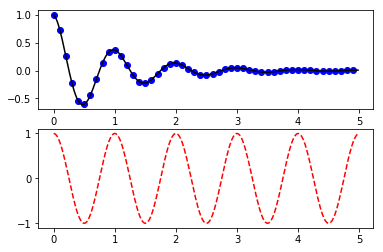

In [2]:
# https://matplotlib.org/tutorials/introductory/pyplot.html

def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)

plt.figure(1)
plt.subplot(211)
plt.plot(t1, f(t1), 'bo', t2, f(t2), 'k')

plt.subplot(212)
plt.plot(t2, np.cos(2*np.pi*t2), 'r--')

### Simple plot using the object-oriented API.
* The recommended style
* Gives the user much more freedom

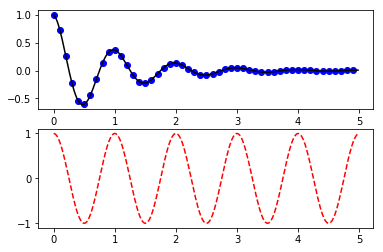

In [3]:
def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)

fig, ax = plt.subplots(2,1)
ax[0].plot(t1, f(t1), 'bo', t2, f(t2), 'k')
ax[1].plot(t2, np.cos(2*np.pi*t2), 'r--')

### You can make some pretty complicated plots. If you ever need help, check out the [axes](https://matplotlib.org/api/axes_api.html) and [figure](https://matplotlib.org/api/_as_gen/matplotlib.figure.Figure.html#matplotlib.figure.Figure) references. You can also check out what plotting functions are available in the [pyplot reference](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.html#module-matplotlib.pyplot).

### Useful keywords:
* set_
* add_
* foo( or .foo
    * where 'foo' is a function of interest 

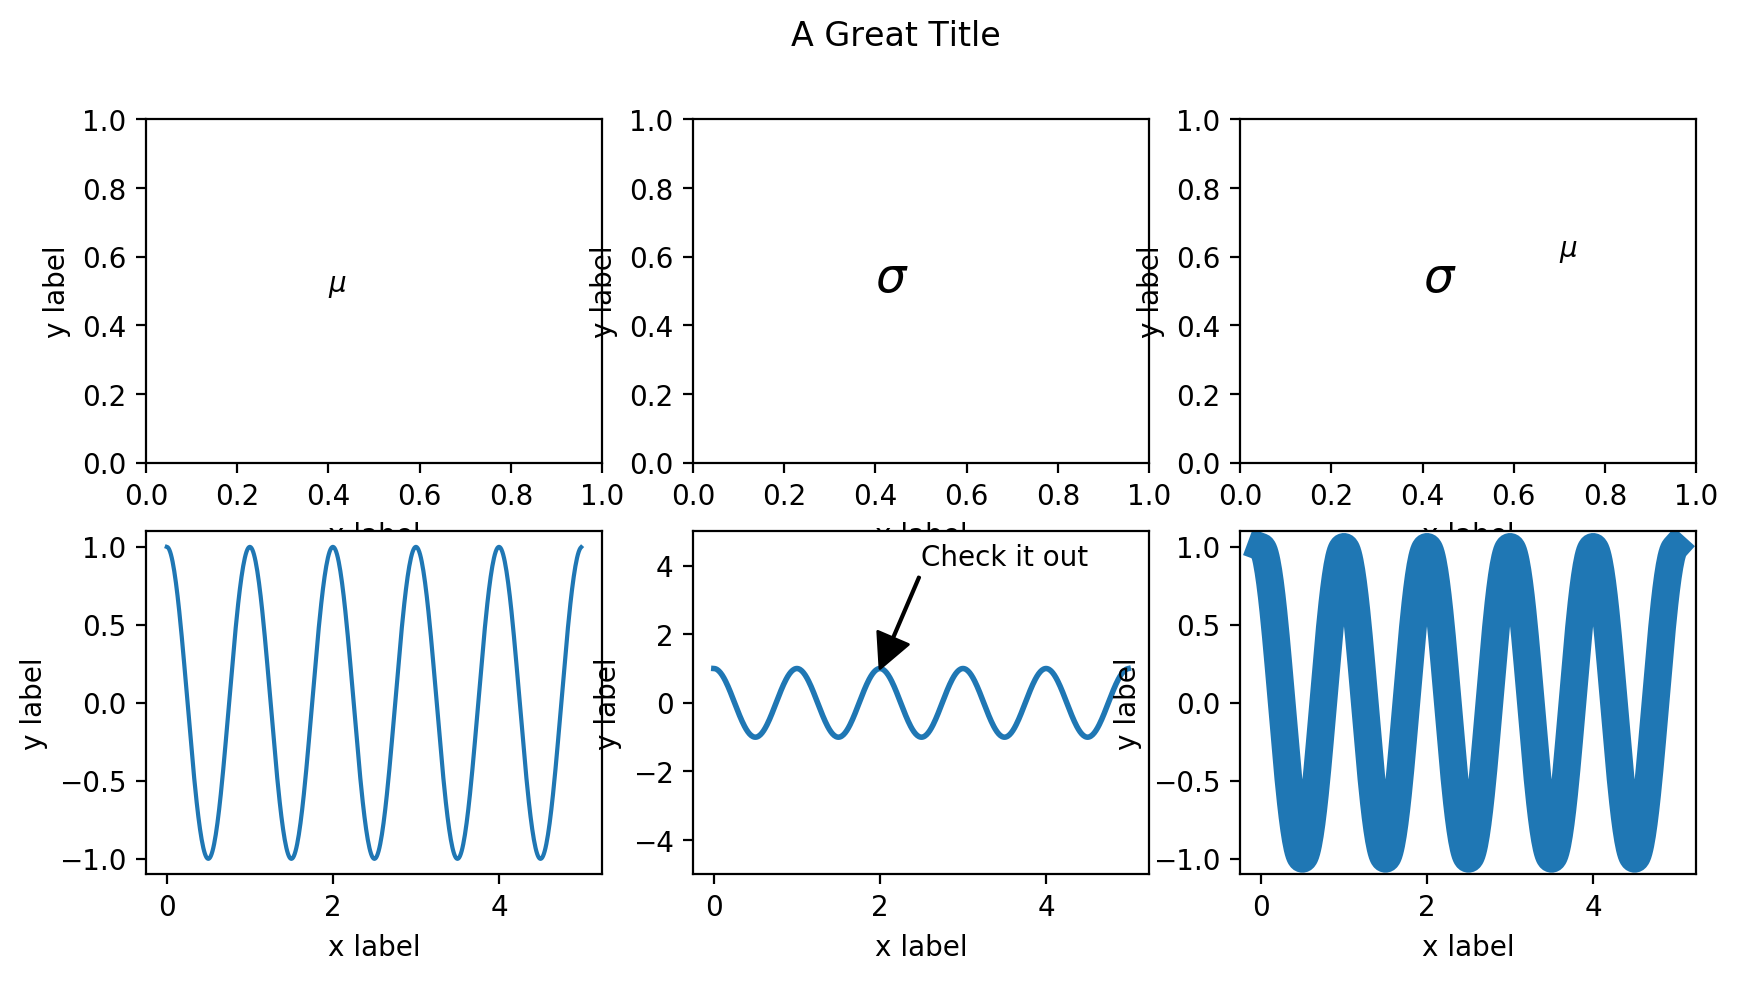

In [4]:
fig, ax = plt.subplots(2,3,figsize=(10,5),dpi=200)

x_position_text = 0.4
y_position_text = 0.5

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2*np.pi*t)

fig.suptitle('A Great Title')

ax[0,0].text(x_position_text, y_position_text, '$\mu$', fontsize='medium')
ax[0,0].set_xlabel('x label')
ax[0,0].set_ylabel('y label')

ax[0,1].text(x_position_text, y_position_text, '$\sigma$', fontsize='xx-large')
ax[0,1].set_xlabel('x label')
ax[0,1].set_ylabel('y label')

ax[0,2].text(x_position_text, y_position_text, '$\sigma$', fontsize='xx-large')
ax[0,2].text(x_position_text+0.3, y_position_text+0.1, '$\mu$', fontsize='medium')
ax[0,2].set_xlabel('x label')
ax[0,2].set_ylabel('y label')

ax[1,0].plot(t, s, label='cosine')
ax[1,0].set_xlabel('x label')
ax[1,0].set_ylabel('y label')

ax[1,1].plot(t, s, linewidth=2, label='cosine')
ax[1,1].set_xlabel('x label')
ax[1,1].set_ylabel('y label')
ax[1,1].set_ylim(-5,5)
ax[1,1].annotate('Check it out', xy=(2, 1), xytext=(2.5, 4), fontsize=10,
                 arrowprops=dict(facecolor='black', 
                                 width=0.5)
                 )

ax[1,2].plot(t, s, lw=10)
ax[1,2].set_xlabel('x label')
ax[1,2].set_ylabel('y label')

<br>

### Group challenge! How can we give the subplot labels more space?

<br><br><br>

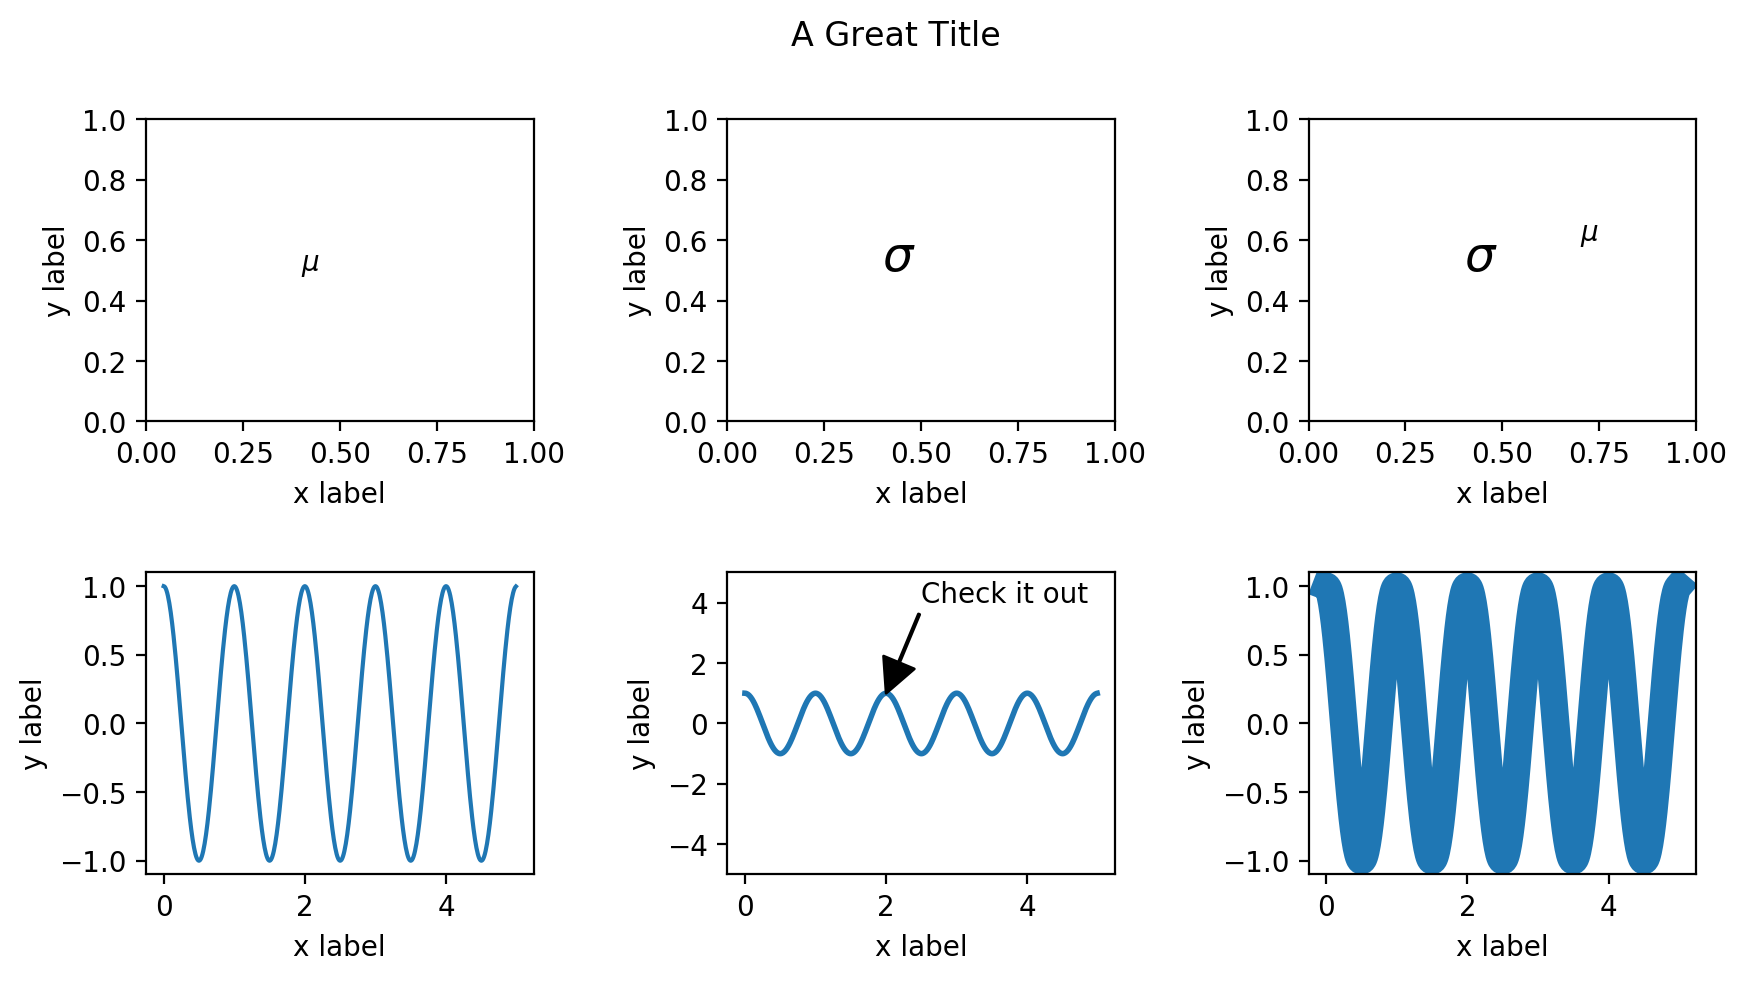

In [14]:
fig, ax = plt.subplots(2,3,figsize=(10,5),dpi=200)

x_position_text = 0.4
y_position_text = 0.5

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2*np.pi*t)


fig.suptitle('A Great Title')
fig.subplots_adjust(hspace=.5)
fig.subplots_adjust(wspace=.5)


ax[0,0].text(x_position_text, y_position_text, '$\mu$', fontsize='medium')
ax[0,0].set_xlabel('x label')
ax[0,0].set_ylabel('y label')

ax[0,1].text(x_position_text, y_position_text, '$\sigma$', fontsize='xx-large')
ax[0,1].set_xlabel('x label')
ax[0,1].set_ylabel('y label')

ax[0,2].text(x_position_text, y_position_text, '$\sigma$', fontsize='xx-large')
ax[0,2].text(x_position_text+0.3, y_position_text+0.1, '$\mu$', fontsize='medium')
ax[0,2].set_xlabel('x label')
ax[0,2].set_ylabel('y label')

ax[1,0].plot(t, s)
ax[1,0].set_xlabel('x label')
ax[1,0].set_ylabel('y label')

ax[1,1].plot(t, s, linewidth=2)
ax[1,1].set_xlabel('x label')
ax[1,1].set_ylabel('y label')
ax[1,1].set_ylim(-5,5)
ax[1,1].annotate('Check it out', xy=(2, 1), xytext=(2.5, 4), fontsize=10,
                 arrowprops=dict(facecolor='black', 
                                 width=0.5)
                 )

ax[1,2].plot(t, s, lw=10)
ax[1,2].set_xlabel('x label')
ax[1,2].set_ylabel('y label')

### Best practice: make plotting funtions so they can be called from a module. 
* Helps keep code clean
* Helps reproducibility

In [15]:
def my_ax_plotter(ax, data_x, data_y, param_dict={}):
    """
    A helper function to plot on axes

    Parameters
    ----------
    ax : Axes
        The axes to draw to

    data_x : array
       The x data

    data_y : array
       The y data

    param_dict : dict
       Dictionary of kwargs to pass to ax.plot

    Returns
    -------
    ax : list
        list of artists added
    """

    ax.plot(data_x, data_y, **param_dict)
    ax.set_xlabel('x label')
    ax.set_ylabel('y label')

    return ax

In [37]:
def my_fig_plotter(data1, data2, data3, data4,
                   save_plot=False, plot_title='tmp', plot_style='default'):
    """
    A helper function to make a graph

    Parameters
    ----------
    data1 : array
       Some data

    data2 : array
       Some different data
       
    data3 : array
       Some different data

    data4 : array
       Some different data

    save_plot : bool
       Option to save the plot
       
    plot_title : string
       Title of saved plot

    Returns
    -------
    None 
    
    """
    with plt.style.context(plot_style):
        fig, ax = plt.subplots(2, 2, figsize=(9,9))
        fig.subplots_adjust(hspace=.5)
        fig.subplots_adjust(wspace=.5)
        my_ax_plotter(ax[0,0], data1, data2, {'marker': 'x'})
        my_ax_plotter(ax[0,1], data1, data3, {'marker': 'o'})
        my_ax_plotter(ax[1,0], data1, data4, {'marker': '^'})
        my_ax_plotter(ax[1,1], data3, data2, {'marker': '$\\frac{1}{2}$'})
    
    if save_plot:
        fig.savefig(plot_title + '.png')
    
    return fig, ax

### Plot [style sheets](https://matplotlib.org/users/style_sheets.html) are fun

In [282]:
print(plt.style.available)

[u'seaborn-darkgrid', u'seaborn-notebook', u'classic', u'seaborn-ticks', u'grayscale', u'bmh', u'seaborn-talk', u'dark_background', u'ggplot', u'fivethirtyeight', u'_classic_test', u'seaborn-colorblind', u'seaborn-deep', u'seaborn-whitegrid', u'seaborn-bright', u'seaborn-poster', u'seaborn-muted', u'seaborn-paper', u'seaborn-white', u'seaborn-pastel', u'seaborn-dark', u'seaborn', u'seaborn-dark-palette']


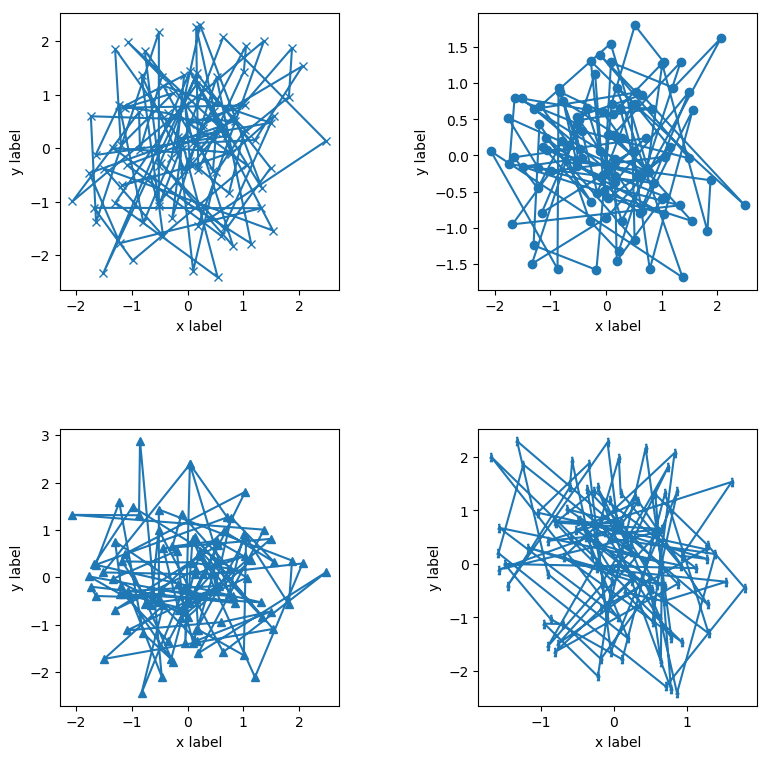

In [38]:
data1, data2, data3, data4 = np.random.randn(4, 100)

fig, ax = my_fig_plotter(data1, data2, data3, data4)

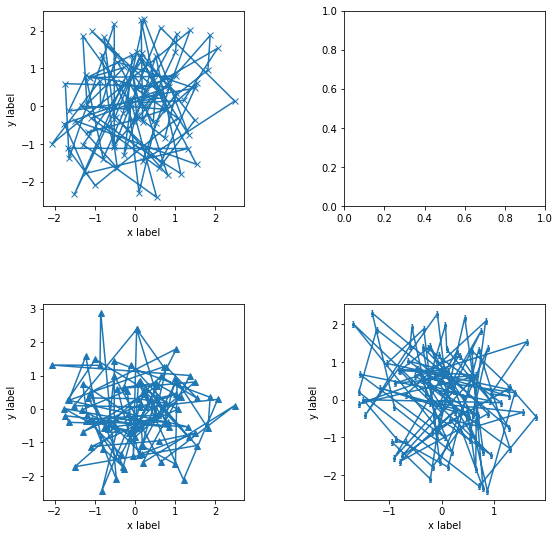

In [61]:
fig, ax = plt.subplots(2, 2, figsize=(9,9))
fig.subplots_adjust(hspace=.5)
fig.subplots_adjust(wspace=.5)
my_ax_plotter(ax[0,0], data1, data2, {'marker': 'x'})
my_ax_plotter(ax[1,0], data1, data4, {'marker': '^'})
my_ax_plotter(ax[1,1], data3, data2, {'marker': '$\\frac{1}{2}$'})

### We can also modifiy the plot outside the function

In [39]:
ax[0,0].set_xlabel('A', fontsize=50)
ax[0,1].tick_params(size=20, colors='r')
ax[1,0].tick_params(axis='x', size=5, colors='g')

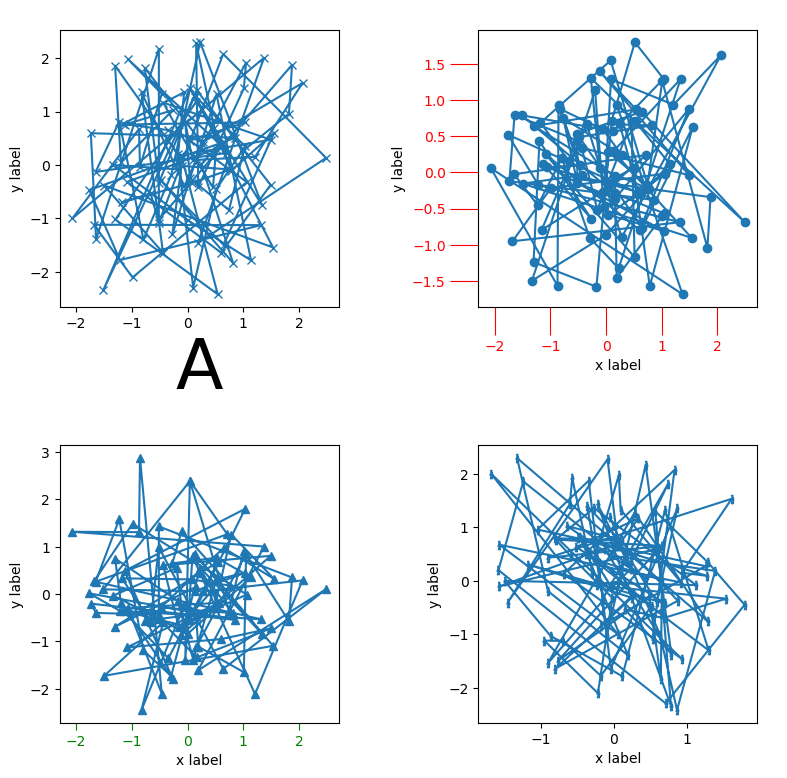

In [40]:
fig

### Plot [style](https://matplotlib.org/gallery/style_sheets/style_sheets_reference.html) [sheets](https://matplotlib.org/users/style_sheets.html) are fun. Use them with `plt.style.context` to avoid changing global settings.

In [282]:
print(plt.style.available)

[u'seaborn-darkgrid', u'seaborn-notebook', u'classic', u'seaborn-ticks', u'grayscale', u'bmh', u'seaborn-talk', u'dark_background', u'ggplot', u'fivethirtyeight', u'_classic_test', u'seaborn-colorblind', u'seaborn-deep', u'seaborn-whitegrid', u'seaborn-bright', u'seaborn-poster', u'seaborn-muted', u'seaborn-paper', u'seaborn-white', u'seaborn-pastel', u'seaborn-dark', u'seaborn', u'seaborn-dark-palette']


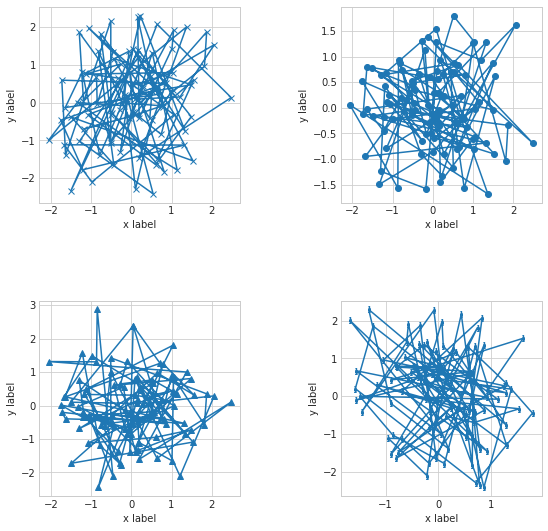

In [49]:
fig, ax = my_fig_plotter(data1, data2, data3, data4, plot_style='seaborn-whitegrid')

### [Colormaps](https://matplotlib.org/examples/color/colormaps_reference.html) are important. Use perceptually uniform colormaps! Not [jet](https://jakevdp.github.io/blog/2014/10/16/how-bad-is-your-colormap/).

### [Seaborn](https://seaborn.pydata.org/tutorial/aesthetics.html), a Matplotlib wrapper, can make very pretty plots

<br><br><br><br>
